# Introduction

The issue of climate change has forced governments, institutions and individuals to reevaluate the global energy mix. Climate change calls for a decrease in use of fossil fuels and a monumental increase in use of renewable and carbon free energy sources. The two forms of renewable energy sources that governments tend to promote are solar and wind. Both sources are inherently intermittent and uncontrollable. Therefore it is critical that we develop predictive/analytical tools, which help us better characterize the performance, efficiency and nature of solar and wind. In this project I have built a tool/model that predicts solar generation from weather forecasts. This model would is site specific. The independent variables of the model are: Temperature; Dew Point; Wind Speed; Insolation Clearness Index; Precipitation; Specific Humidity. The dependent variable of the model is: Solar Irradiance. I have used machine learning techniques to derive prediction models that correlate the independent variables to the dependent variable. The machine learning models I used to develop the predictive tool are variants of the Support Vector Machine Regression (SVMR) method. I have built two models, one uses a linear kernel and the other uses a Radial Basis Function Kernel. Towards the end of the document I discuss the accuracy and efficacy of both models.

# Method

### Obtaining the Data

The data was obtained from a NASA database. The following is the url of the database: https://power.larc.nasa.gov/data-access-viewer/. The database, lets me obtain data pertaining to Meteorology and Solar Irradiance. I can filter the available data with the following ribbons: Longitude/Latitude, Time Horizon, Temporal Average, Time Horizon and Parameter Selection. For the Longitude/Latitude I chose the coordinates of New York City. My Temporal Average was set to daily and time horizon was set to the following dates: 01/01/2007 to 12/31/2007. I choose 2007 to be my year of investigation as it was the most recent year which had no missing data in reference to my independent variables. The format of the data file outputted by the database was CSV. I saved the CSV file on my local hard-drive and named it 'Solar ML Project Data'.     

### Importing the Data on a Jupyter Notebook and creating a Data Frame

In the following cells, I am importing my data in to the Jupyter notebook. I do not import the headers of the data file and certain obsolete columns. After importing the data I organize the data through the aide of pandas. In the third cell I generate a data frame which consists of the imported data and pre-defined headers of said data.

In [ ]:
import pandas as pd
import os

In [ ]:
pwd

'C:\\Users\\sikan\\Desktop'

In [ ]:
df = pd.read_csv(r"C:\Users\sikan\Desktop\Reservoir Model Data Transfer\CMGBuilder1 Pressure Time 2016-01-01.csv", delimiter=',', skiprows=4, usecols=[1,2],
                 names=['X', 'Y'])

### Extracting and Organizing Relevant Data from Data Frame

In the following cells I am isolating the data relevant to each independent and dependent variable. Once I have isolated the data, I categorize the isolated data as a new data frame. I am isolating data for the following independent/dependent variables: Precipitation, Specific Humidity, Dew Point, Temperature, Wind Speed, Solar Irradiance and Insolation Clearness index.

In [ ]:
d1=df['Precipitation']
print(d1)

0      35.21
1       0.01
2       0.00
3       0.01
4       4.40
       ...  
360     2.38
361     2.49
362    11.97
363     8.71
364     2.80
Name: Precipitation, Length: 365, dtype: float64


In [ ]:
d2=df['Specific Humidity']
print(d2)

0      0.006942
1      0.003860
2      0.004203
3      0.005516
4      0.008184
         ...   
360    0.004192
361    0.004061
362    0.005123
363    0.003649
364    0.003682
Name: Specific Humidity, Length: 365, dtype: float64


In [ ]:
d3=df['Dew Point']
print(d3)

0       8.29
1       0.12
2       1.36
3       5.19
4      10.88
       ...  
360     1.35
361     0.97
362     3.97
363    -0.55
364    -0.50
Name: Dew Point, Length: 365, dtype: float64


In [ ]:
d4=df['Temprature']
print(d4)

0       8.61
1       3.16
2       3.03
3       5.73
4      11.13
       ...  
360     1.90
361     3.20
362     5.21
363     1.06
364     0.97
Name: Temprature, Length: 365, dtype: float64


In [ ]:
d5=df['Wind Speed']
print(d5)

0      3.63
1      4.44
2      3.49
3      2.94
4      3.60
       ... 
360    2.62
361    2.48
362    3.29
363    2.40
364    3.30
Name: Wind Speed, Length: 365, dtype: float64


In [ ]:
d6=df['Solar Irradiance']
print(d6)

0      7.77
1      6.58
2      6.22
3      6.86
4      8.24
       ... 
360    6.97
361    6.01
362    7.20
363    6.67
364    6.25
Name: Solar Irradiance, Length: 365, dtype: float64


In [ ]:
d7=df['Insolation Clearness Index']
print(d7)

0      0.13
1      0.69
2      0.65
3      0.55
4      0.16
       ... 
360    0.17
361    0.66
362    0.46
363    0.35
364    0.67
Name: Insolation Clearness Index, Length: 365, dtype: float64


The following cell converts the newly formed data frames generated in the previous cells to a numpy array. I do this as it is easier to feed numpy arrays in to the sklearn module than data frames.

In [ ]:
d1a=d1.to_numpy()
#print(d1a)
d2a=d2.to_numpy()
#print(d2a)
d3a=d3.to_numpy()
#print(d3a)
d4a=d4.to_numpy()
#print(d4a)
d5a=d5.to_numpy()
#print(d5a)
d6a=d6.to_numpy()
#print(d6a)
d7a=d7.to_numpy()
print(d7a)

[0.13 0.69 0.65 0.55 0.16 0.48 0.54 0.08 0.43 0.53 0.6  0.26 0.22 0.18
 0.13 0.19 0.76 0.33 0.6  0.52 0.47 0.21 0.55 0.48 0.66 0.71 0.23 0.48
 0.63 0.61 0.75 0.48 0.43 0.66 0.72 0.7  0.73 0.72 0.77 0.68 0.76 0.75
 0.48 0.34 0.13 0.52 0.65 0.7  0.55 0.73 0.31 0.7  0.28 0.65 0.77 0.35
 0.18 0.37 0.7  0.56 0.47 0.54 0.39 0.51 0.74 0.3  0.58 0.69 0.37 0.64
 0.67 0.5  0.54 0.13 0.09 0.4  0.52 0.34 0.59 0.54 0.53 0.13 0.4  0.61
 0.4  0.6  0.65 0.77 0.68 0.38 0.14 0.47 0.67 0.05 0.51 0.43 0.5  0.47
 0.68 0.68 0.59 0.11 0.19 0.6  0.02 0.2  0.3  0.34 0.29 0.78 0.72 0.76
 0.72 0.6  0.42 0.45 0.09 0.39 0.41 0.67 0.35 0.56 0.74 0.71 0.72 0.67
 0.72 0.75 0.64 0.35 0.43 0.54 0.75 0.72 0.66 0.43 0.48 0.33 0.33 0.46
 0.75 0.7  0.67 0.73 0.72 0.58 0.58 0.46 0.77 0.75 0.64 0.5  0.53 0.25
 0.18 0.49 0.64 0.63 0.62 0.56 0.34 0.53 0.44 0.24 0.21 0.49 0.55 0.64
 0.61 0.55 0.45 0.67 0.62 0.75 0.71 0.33 0.6  0.51 0.55 0.32 0.67 0.59
 0.65 0.67 0.17 0.26 0.58 0.66 0.67 0.66 0.51 0.29 0.71 0.52 0.68 0.54
 0.47 

The following cell consists of a ‘for’ loop. This loop generates a list. The list has 365 sublists. Each sublist consists of six numbers. Each number corresponds to the value of one of six independent variables. Each sublist represents a different day of the year, 2007.   

In [ ]:
import numpy as np
l1=[]
i=0
for i in range (0, 365):
    l1.insert(i, [d1a[i],d2a[i],d3a[i], d4a[i], d5a[i], d7a[i]])
    i=i+1
print(l1)


[[35.21, 0.006942, 8.29, 8.61, 3.63, 0.13], [0.01, 0.00386, 0.12, 3.16, 4.44, 0.69], [0.0, 0.004203, 1.36, 3.03, 3.49, 0.65], [0.01, 0.005516, 5.19, 5.73, 2.94, 0.55], [4.4, 0.008184, 10.88, 11.13, 3.6, 0.16], [1.02, 0.00905, 12.22, 13.9, 4.69, 0.48], [8.31, 0.004765, 3.16, 5.91, 2.74, 0.54], [24.97, 0.006051, 5.67, 7.6, 5.21, 0.08], [0.03, 0.00328, -2.07, 0.87, 3.82, 0.43], [0.04, 0.0025210000000000002, -5.37, -1.63, 4.52, 0.53], [0.0, 0.002538, -5.07, -1.45, 2.69, 0.6], [0.0, 0.004384000000000001, 2.01, 3.24, 3.67, 0.26], [2.53, 0.005884, 6.12, 6.65, 2.77, 0.22], [3.31, 0.005364, 4.84, 5.46, 1.83, 0.18], [1.94, 0.0057929999999999995, 5.59, 5.82, 2.5, 0.13], [0.29, 0.0036880000000000003, -1.85, 1.74, 5.33, 0.19], [0.0, 0.0016539999999999999, -10.23, -5.09, 4.05, 0.76], [0.47, 0.0029850000000000002, -3.49, -1.31, 2.07, 0.33], [1.33, 0.0033369999999999997, -1.86, 0.43, 4.39, 0.6], [0.09, 0.001994, -8.36, -3.91, 6.83, 0.52], [0.03, 0.001745, -9.72, -5.53, 2.26, 0.47], [0.06, 0.002778, -4

### Understanding Support Vector Machine- Regression Using a Linear Kernel

In SVM regression using a linear kernel, the input 'x' is first mapped onto a m-dimensional feature space using fixed (nonlinear) mapping, thereafter a linear model is constructed in this feature space. Using mathematical notation, the linear model generated in the feature space is given by:

$$f(x,w)=\sum_{j=1}^{m}w_{j}g_{j}(x) +b$$

The $g_{j}(x), j=1,..,m$ represents a number of non-linear transformations and 'b' is a bias term. When the data is pre-processed resulting in the data to have a zero mean the bias term can be neglected. The quality of linear model is dependent on an epsilon insensitive loss function developed by Vapnik .The following is the insensitive loss function:

$$ L(y, f(x,w))=\left\{\begin{matrix} 0\ if  \left | y-f(x,w) \right |\leq \varepsilon \\ \left | y-f(x,w) \right |-\varepsilon\ otherwise \end{matrix}\right.$$


SVM regression performs linear regression in the high-dimension feature space using epsilon insensitive loss. At the same time it tries to reduce model complexity by minimizing $\left \| w^{2} \right \|$ and tries to account for sparse data by minimizing cumulative penalty cost associated with the data points situated outside the epsilon margins . The mathematical representation of the minimization formulations is the following:

$$ min \frac{1}{2} \left \| w^{2} \right \|+C\sum_{i=1}^{n}(\xi _{i}+\xi _{i}^{*}) $$
$$st\left\{\begin{matrix}
y_{i}-f(x_{i},w)\leq \varepsilon +\xi _{i}^{*}\\f(x_{i},w)-y_{i}\leq \varepsilon +\xi _{i} 
\\ \xi ,\xi _{i}^{*}\geq 0, i=1,..,n
\end{matrix}\right.$$

The $ \xi ,\xi _{i}^{*}\geq 0, i=1,..,n$ are slack variables that measure the level of deviation of the points situated outside the epsilon margins. 'C' is a positive cost parameter that controls the penalty imposed on the data points outside the epsilon margin.   

![image.png](attachment:image.png)

### Understanding Support Vector Machine- Regression Using a Radial Basis Function Kernel

The minimization formulation illustrated in the previous section can be transformed in to its dual formulation. The solution of the dual formulation is the following:
$$f(x)=\sum_{i=1}^{n_{sv}}(\alpha_{i}-\alpha _{i}^{*})K(x,x_{i})$$
$$st. \ 0\leq \alpha _{i}^{*}\leq C , 0\leq \alpha ^{i}\leq C$$
where 'K' is the kernel function and $n_{sv}$ is the number of support vectors. The kernel function for the Radial Basis Function is the following:
$$K(x_{i},x)=exp(-\gamma \left \|x-x_{i} \right \|^{2})$$
where $\gamma$ is a free parameter


### Splitting Data

The following Cell splits the data according to train:test ratio of 80:20. It does this by using a module in skleanr named train_test_split. The train:test ratio is pretty standard in litrature. X is values of the independant variables defined in the introduction and y is the value of the dependant variable defined in the introduction.

In [ ]:
from sklearn.model_selection import train_test_split
X=np.array(l1)
y=np.array(d6a)

(X_train, X_test,
 y_train, y_test) = train_test_split(X, y,
                                     test_size=0.2,
                                     shuffle=True,
                                     random_state=42)


### Generating a Pipeline

In the following cell I am generating a pipeline. The pipeline pre-processes the training data first in accordance to the standard scalar module. The standard scalar module standardizes features by removing the mean and scaling to unit variance. By pre-processing the data I will eliminate the bias term of the linear model generated in the feature space by Support Vector Machines. Post pre-processing, the training data is inputted in to the svm.svr model. The hyper-parameters and kernel of the svm.svr model are kept at their default values.  

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn import preprocessing


scaler = preprocessing.StandardScaler()
model = SVR(gamma='auto')

X = X_train
y = y_train

pipe = Pipeline([('scale', scaler),
                 ('SVR', model)])

pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVR',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='auto', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

### Initiating K-Fold Cross Validation Analysis

In the following Cell I execute the steps outlined below:
 1. Shuffling the dataset in a random manner
 2. Split the dataset into K number of groups
 3. For each unique K group:
    1. I take the group as a test data set
    2. I define the cumulation of remaining groups as a training data set
    3. I fit a svm.svr model on the training data set and evaluate it on the test data set
    4. I then obtain the evaluation score of the iteration and discard the model

The purpose of doing the K-fold cross validation analysis is the following:
 - To determine if a particular subset of the training data set significatly decreases the quality of model
 - To test my proposed model generalizability over a multitude of testing data sets  

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)

for i, (train, test) in enumerate(kf.split(X)):
    pipe.fit(X[train], y[train])
    print(f'The score of training and testing data set for K fold {i+1}')
    print(pipe.score(X[train], y[train]), pipe.score(X[test], y[test]))


The score of training and testing data set for K fold 1
0.9519955403184469 0.9150309349429788
The score of training and testing data set for K fold 2
0.9473037162342374 0.9474210161639565
The score of training and testing data set for K fold 3
0.9519515200150067 0.914971468106913
The score of training and testing data set for K fold 4
0.950425959389802 0.9375749318964238
The score of training and testing data set for K fold 5
0.9487173752877914 0.9428646443138362


As shown in the results above, I executed 5 folds. In each fold the scores were very high for both the training and testing data set. This shows my proposed model is very robust and ranks high in terms of generalizability. Furthermore the scores for each fold were very similar, that implies no subset of the training data set has a significant negative impact on my model's quality.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipe, X, y, cv=5)
print(scores)
print(f"Accuracy of model: {scores.mean():0.2f} (+/- {scores.std() * 2:0.2f})")

[0.91503093 0.94742102 0.91497147 0.93757493 0.94286464]
Accuracy of model: 0.93 (+/- 0.03)


The above score takes an average of the scores obtained during the K-fold cross validation analysis. The high average score reiterates the good quality of the model. The error associated with the mean of the scores is the standard deviation of scores obtained during the K-fold analysis.   

### Tuning/Optimizing Hyper Parameters of Proposed Model

In the following cells I refine the proposed model executed by the first pipeline by tuning the hyper parameter of the svm.svr model. The hyper parameters I will be tuning are the: cost coefficient, epsilon and gamma. I am tuning the hyper parameters for two kernels. The two kernels are the linear kernel and the Radial basis function kernel. To tune the hyper parameters for each kernel I use the GridSearchCV module on sklearn. While GridSearchCV has a significant overhead it is very extensive and exhaustive. To attempt to decrease the overhead I specify the range of values for each hyper parameter over which GridSearchCV searches. These range of values come from literature.  

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn import preprocessing


scaler = preprocessing.StandardScaler()
model = SVR(gamma='auto')

X = X_train
y = y_train

pipe4 = Pipeline([('scale', scaler),
                 ('SVR', model)])

pipe4.fit(X, y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVR',
                 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
                     gamma='auto', kernel='rbf', max_iter=-1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In the previous cell I developed a second pipeline. The purpose of the second pipeline is to use it for a grid search, which in turn tunes hyper parameters. This pipeline is exactly the same as the first pipeline.

In [ ]:
pipe4.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scale', 'SVR', 'scale__copy', 'scale__with_mean', 'scale__with_std', 'SVR__C', 'SVR__cache_size', 'SVR__coef0', 'SVR__degree', 'SVR__epsilon', 'SVR__gamma', 'SVR__kernel', 'SVR__max_iter', 'SVR__shrinking', 'SVR__tol', 'SVR__verbose'])

In the following cell I am tuning the hyper parameters over a pre-determined range. The kernel being used for the tuning process is the Radial Basis function. The first three lines of the following cell display the pre-defined range of the hyper-parameters.

In [ ]:
pC= np.arange(100, 130)
pG= np.arange(0.013, 0.019, 0.002)
pE= np.arange(0.0008, 0.0014, 0.0001)

tuned_parameters = [{'SVR__kernel': ['rbf'], 'SVR__gamma': pG,
                     'SVR__C': pC, 'SVR__epsilon': pE} ]


from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipe4 , tuned_parameters, cv=5)
clf.fit(X_train, y_train)

print('The following are the values of the tuned hyper-parameters:')
print(clf.best_params_)

The following are the values of the tuned hyper-parameters:
{'SVR__C': 129, 'SVR__epsilon': 0.0009000000000000001, 'SVR__gamma': 0.017, 'SVR__kernel': 'rbf'}


In the following cell I am tuning the hyper parameters over a pre-determined range. The kernel being used for the tuning process is the Linear function. The first two lines of the following cell display the pre-defined range of the hyper-parameters. Gamma is not being tuned in the following cell as gamma is not used in the linear kernel.

In [ ]:
pC= np.arange(250, 270)
pE= np.arange(0.0015, 0.0019, 0.0002)

tuned_parameters = [{'SVR__kernel': ['linear'], 
                     'SVR__C': pC, 'SVR__epsilon': pE} ]


from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(pipe4 , tuned_parameters, cv=5)
clf.fit(X_train, y_train)

print('The following are the values of the tuned hyper-parameters:')
print(clf.best_params_)

The following are the values of the tuned hyper-parameters:
{'SVR__C': 261, 'SVR__epsilon': 0.0017000000000000001, 'SVR__kernel': 'linear'}


### Generating Two pipelines With Different Kernels and Specified Values for Hyper-parameters 

The following two cells develops two pipelines. The first pipeline is name pipe5. pipe5 preprocesses its data the same way as the first two pipelines. The model part of pipe5 uses svm.svr with a radial basis function kernel and the relevant tuned values obtained in the previous section for the hyper-parameters. The second pipeline is name pipe6. pipe6 preprocesses its data the same way as the first two pipelines. The model part of pipe6 uses svm.svr with a linear kernel and the relevant tuned values obtained in the previous section for the hyper-parameters.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn import preprocessing


scaler = preprocessing.StandardScaler()
model = SVR(gamma=0.017, epsilon=0.0009000000000000001, C=129, kernel='rbf')

X1 = X_train
y1 = y_train

pipe5 = Pipeline([('scale', scaler),
                 ('SVR', model)])

pipe5.fit(X1, y1)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVR',
                 SVR(C=129, cache_size=200, coef0=0.0, degree=3,
                     epsilon=0.0009000000000000001, gamma=0.017, kernel='rbf',
                     max_iter=-1, shrinking=True, tol=0.001, verbose=False))],
         verbose=False)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn import preprocessing


scaler = preprocessing.StandardScaler()
model = SVR(epsilon=0.0017000000000000001, C=261, kernel='linear')

X2 = X_train
y2 = y_train

pipe6 = Pipeline([('scale', scaler),
                 ('SVR', model)])

pipe6.fit(X2, y2)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('SVR',
                 SVR(C=261, cache_size=200, coef0=0.0, degree=3,
                     epsilon=0.0017000000000000001, gamma='auto_deprecated',
                     kernel='linear', max_iter=-1, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

# Results/Disscussion

In the following cell I am using the model formulated in pipe5 and the independent variable values in the test data set to predict the dependent variable values (Solar Irradiance). The units of the predicted values is $\frac{kW*hr}{m^{2}*day}$

In [ ]:
pipe5.predict(X_test)

array([9.08129242, 5.72215112, 6.97752806, 7.67095077, 6.66181071,
       8.24767749, 6.10265925, 7.64619081, 9.28159988, 7.08076628,
       6.50441996, 5.41932962, 8.20196377, 6.33021759, 8.14815958,
       7.43618656, 8.18982278, 9.09569642, 7.85651769, 7.68584534,
       6.29257667, 8.63650906, 7.84955673, 9.72368993, 8.82383856,
       9.32859901, 9.27354118, 8.12417753, 7.07297302, 6.47796206,
       5.05101113, 7.85907793, 6.28240353, 6.63131612, 9.29495573,
       7.94367006, 6.46582967, 6.21857531, 6.96374583, 6.42996588,
       9.52052373, 7.42183243, 5.39560637, 8.34973673, 6.79928763,
       9.30073881, 7.60531307, 6.82944968, 8.33986791, 5.69310851,
       9.06031333, 7.16437953, 9.18093754, 8.34736737, 9.29070689,
       6.499623  , 7.74997533, 7.15256901, 6.89382544, 6.51086296,
       9.61120971, 6.33426046, 6.44711522, 5.33373705, 7.92796111,
       8.07313755, 8.89410033, 7.41513615, 9.30146511, 7.50955293,
       6.74845755, 8.30143519, 8.14981545])

The following cell displays the dependant varaible (Solar Irradiance) values from the test data set.

In [ ]:
y_test

array([8.39, 5.46, 7.42, 7.32, 7.1 , 8.52, 6.89, 7.41, 9.38, 7.42, 6.03,
       4.62, 7.61, 6.21, 8.37, 6.96, 7.77, 8.9 , 7.9 , 7.66, 7.04, 8.71,
       7.89, 9.76, 9.3 , 9.4 , 9.42, 8.52, 7.12, 6.01, 4.84, 7.69, 5.7 ,
       6.74, 9.63, 7.99, 6.42, 6.39, 6.78, 6.39, 9.82, 7.83, 5.44, 8.3 ,
       6.58, 9.75, 7.55, 6.57, 8.52, 5.81, 9.33, 6.52, 8.63, 8.  , 9.24,
       6.72, 7.62, 6.86, 6.27, 6.96, 9.8 , 6.69, 7.26, 5.19, 8.19, 8.02,
       9.34, 6.75, 9.35, 7.6 , 7.03, 8.88, 7.94])

In the following cell I am using the model formulated in pipe6 and the independent variable values in the test data set to predict the dependent variable values (Solar Irradiance). The units of the predicted values is $\frac{kW*hr}{m^{2}*day}$

In [ ]:
pipe6.predict(X_test)

array([8.92475506, 5.72670248, 7.200001  , 7.43609888, 6.68879259,
       8.26723694, 6.13106026, 7.71384965, 9.25118247, 7.1303906 ,
       6.67681944, 5.46828402, 8.00801052, 6.2950673 , 7.98400302,
       7.29401629, 8.04305298, 9.02931065, 7.80489065, 7.49602066,
       6.22538251, 8.49465974, 7.77556824, 9.91203104, 8.88711491,
       9.32627935, 9.23421292, 8.16644603, 7.20535293, 6.55863662,
       5.06264134, 7.7452262 , 6.20859253, 6.62904028, 9.18813447,
       7.74596915, 6.31774456, 6.16723581, 7.24250451, 6.34071804,
       9.4438973 , 7.49966961, 5.6216461 , 8.20827851, 7.06226444,
       9.43753037, 7.62926084, 6.90302022, 8.26724057, 5.44051681,
       9.15772062, 6.98045345, 9.10231485, 8.35199652, 9.35563768,
       6.40909856, 7.72052692, 7.13444384, 6.9205164 , 6.5253593 ,
       9.59862429, 6.34076163, 6.46480744, 5.32542801, 8.16221645,
       8.17720182, 8.99648837, 7.46806994, 9.32429723, 7.33520681,
       6.64025356, 8.51217844, 7.9858023 ])

In the following two cells I display two graphs. In the first graph I plot predicted values from pipe5 and the real values from the test data set. In the second graph I plot predicted values from pipe6 and the real values from the test data set. In both graphs the y axis is the dependent variable (Solar irradiance) and the x axis is days. I plotted these two graph visualize the difference between the predicted and real values.  

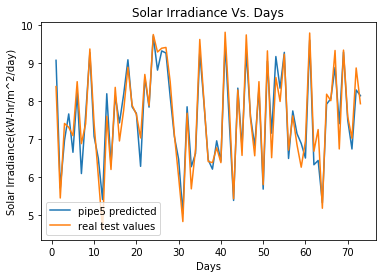

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
t=np.array(range(1,74))
line1= plt.plot(t,pipe5.predict(X_test), label='pipe5 predicted')
line2= plt.plot(t,y_test, label='real test values')
plt.xlabel('Days')
plt.ylabel('Solar Irradiance(kW-hr/m^2/day)')
plt.title('Solar Irradiance Vs. Days')
plt.legend()

From the graph above it be inferred that pipe5 predicted values do follow the general trend of the real data. It seems that whenever there is abrupt change in slope, the model does not predict accurate values. The reason behind this might be the models inability to model trends that are discontinuous in nature.

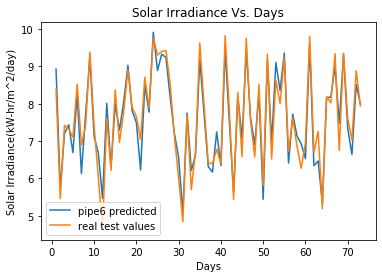

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
t=np.array(range(1,74))
line1= plt.plot(t,pipe6.predict(X_test), label='pipe6 predicted')
line2= plt.plot(t,y_test, label='real test values')
plt.xlabel('Days')
plt.ylabel('Solar Irradiance(kW-hr/m^2/day)')
plt.title('Solar Irradiance Vs. Days')
plt.legend()

From the graph above it be inferred that pipe6 predicted values do follow the general trend of the real data. pipe5 and pipe6 from a visual perspective predict values of similar quality. In the cell below I am calculating the root mean square error for model pipe5 and model pipe6.By doing this I can better understand, which model is of a higher quality.

In [ ]:
import sklearn
import math

mse = sklearn.metrics.mean_squared_error(y_test, pipe5.predict(X_test))

rmse = math.sqrt(mse)

mse1 = sklearn.metrics.mean_squared_error(y_test, pipe6.predict(X_test))

rmse1 = math.sqrt(mse1)


print(f'The root mean square error for pipe5 is {rmse}')
print(f'The root mean square error for pipe6 is {rmse1}')

The root mean square error for pipe5 is 0.3657674133042996
The root mean square error for pipe6 is 0.36122324273492634


From the values published above, it can be understood that the quality of both models is pretty similar. However model pipe6 that is executed with the linear function kernel does predict slightly better quality values as it has a lower root mean square error. 

# Conclusion/Evaluation

The two models generated in this project use Support Vector Machine-Regression. One of the model uses a Linear kernel and the other model uses a Radial Basis Function kernel. The training data set for both models have undergone preprocessing and have been standardized. The hyper-parameters have been tuned through the aide of literature and GridSearchCV. After refining the two models, the models have predicted values of decent quality. The root mean square error associated with both models is relatively low. The model that uses the linear kernel seems to be of higher quality. There are a number of limitations of the two models generated, the following are few of the limitations:
 - The testing and training data sets of both models represent a relatively small time horizon. This negatively effects the generalizability of the models
 - I have not done a sensitivity analysis of the independent variables. Therefore I may have to many features integrated in the model which may be leading to over fitting
 - This model may not be accurate if we test it on values obtained in 2020 as the training data is very old


# Citations

- https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998
- https://scikit-learn.org/stable/modules/svm.html#regression
- https://ieeexplore.ieee.org/document/6102379
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
- https://machinelearningmastery.com/k-fold-cross-validation/
- https://en.wikipedia.org/wiki/Radial_basis_function_kernel
- https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72

